# Análisis exploratorio de datos

## `groceries-dataset`

### Lectura de datos

In [110]:
import pandas as pd

df = pd.read_csv('data/groceries-dataset/Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


### Preprocesamiento

In [111]:
df.columns = ['member', 'date', 'item']

df['member'] = df['member'].astype(str)
# df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.dtypes

member    object
date      object
item      object
dtype: object

In [169]:
import numpy as np
from datetime import datetime

df_date_grouped = df.sort_values('date').groupby(['member','item']).agg('|'.join).reset_index()
df_date_grouped['n_buys'] = df_date_grouped['date'].apply(lambda x: len(x.split('|')))
df_date_grouped = df_date_grouped[df_date_grouped['n_buys'] > 1]
df_date_grouped.drop('n_buys', axis=1)
df_date_grouped = df_date_grouped.sort_values('n_buys', ascending=False)
df_date_grouped['date'] = df_date_grouped['date'].apply(lambda x: x.split('|'))
df_date_grouped['date'] = df_date_grouped['date'].apply(lambda x: sorted([datetime.strptime(x_, '%d-%m-%Y') for x_ in x]))
df_date_grouped['date_mean'] = df_date_grouped['date'].apply(lambda x: np.mean([x_.days for x_ in np.diff(x)]))
df_date_grouped['date_std'] = df_date_grouped['date'].apply(lambda x: np.std(np.diff([x_.days for x_ in np.diff(x)])))

/Users/wilmerags/anaconda3/envs/dm_env/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/wilmerags/anaconda3/envs/dm_env/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/wilmerags/anaconda3/envs/dm_env/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [185]:
df_date_grouped

,member,item,date,n_buys,date_mean,date_std
12065,2390,other vegetables,"[2014-01-18 00:00:00, 2014-01-18 00:00:00, 201...",6,116.00,171.413973
22322,3582,whole milk,"[2014-04-08 00:00:00, 2014-05-27 00:00:00, 201...",5,108.75,236.466112
16170,2861,whole milk,"[2014-04-15 00:00:00, 2014-10-25 00:00:00, 201...",5,149.00,158.293679
33694,4864,whole milk,"[2014-12-03 00:00:00, 2015-03-27 00:00:00, 201...",5,91.50,180.695570
3136,1363,whole milk,"[2014-07-21 00:00:00, 2015-06-16 00:00:00, 201...",5,112.50,187.631435
...,...,...,...,...,...,...
12516,2440,bottled beer,"[2015-03-02 00:00:00, 2015-06-19 00:00:00]",2,109.00,NaN
12520,2440,domestic eggs,"[2014-01-28 00:00:00, 2014-11-10 00:00:00]",2,286.00,NaN
12539,2441,canned beer,"[2014-08-28 00:00:00, 2015-05-31 00:00:00]",2,276.00,NaN
12557,2443,pastry,"[2014-09-02 00:00:00, 2015-01-12 00:00:00]",2,132.00,NaN


<Axes: ylabel='Density'>

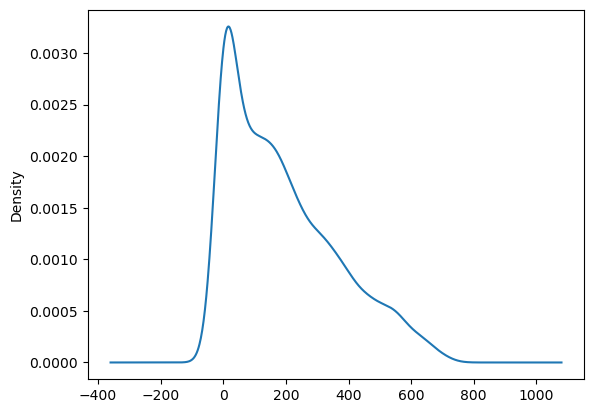

In [175]:
# df_date_grouped.apply(lambda x: np.average(x.wt, weights=x.value))
# (values * weights).groupby(by).sum() / weights.groupby(by).sum()
df_date_grouped['date_mean'].plot(kind='kde')

In [187]:
df_date_grouped_item = df_date_grouped.groupby('item')['date_mean'].mean().reset_index()
df_date_grouped_item['sum_n_buys'] = df_date_grouped.groupby('item')['n_buys'].sum().reset_index()['n_buys']
df_date_grouped_item

,item,date_mean,sum_n_buys
0,UHT-milk,256.062500,33
1,baking powder,0.000000,2
2,beef,227.893617,97
3,berries,219.687500,32
4,beverages,142.875000,17
...,...,...,...
93,whipped/sour cream,209.935185,113
94,white bread,205.812500,32
95,white wine,182.750000,8
96,whole milk,181.818508,1250


<Axes: xlabel='date_mean', ylabel='sum_n_buys'>

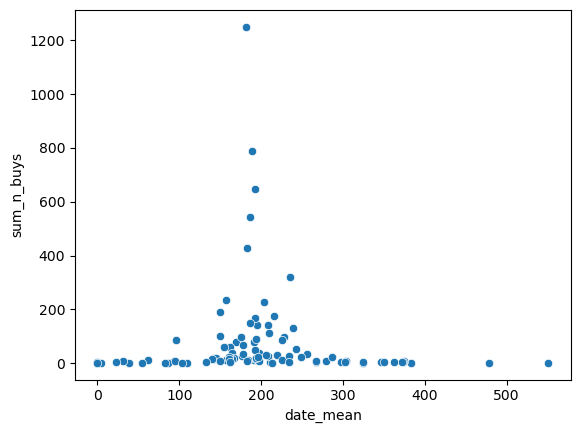

In [188]:
import seaborn as sns
sns.scatterplot(data=df_date_grouped_item, x="date_mean", y="sum_n_buys")

<Axes: >

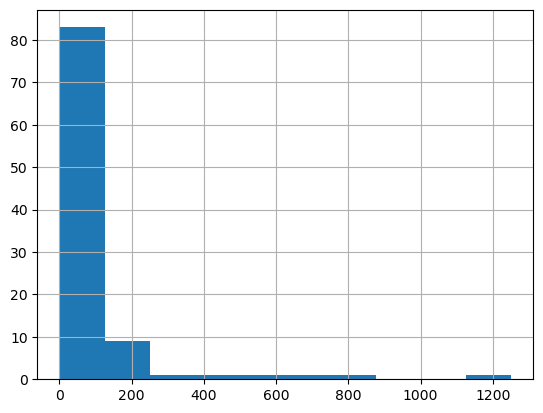

In [191]:
df_date_grouped_item['sum_n_buys'].hist()

In [192]:
df_date_grouped_item

,item,date_mean,sum_n_buys
0,UHT-milk,256.062500,33
1,baking powder,0.000000,2
2,beef,227.893617,97
3,berries,219.687500,32
4,beverages,142.875000,17
...,...,...,...
93,whipped/sour cream,209.935185,113
94,white bread,205.812500,32
95,white wine,182.750000,8
96,whole milk,181.818508,1250
